In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   
...             ...     ...        ...        ...          ...       ...   
7/15/20        8986   49243      32074       3147        10645     30036   
7/16/20        9546   50373      32939       3147        10957     30867   
7/17/20        9969   51408      33809       3147        11207     31745   
7/18/20       10551   52261      38042       3147        11508     32793   
7/19/20       11114   53468      38677       3147        11846     33835   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    1        0                    0     0  
3/2/20                    1        0                    0     0  
3/3/20                    1        0                    0     0  
3/4/20                    1        0                    0     0  
...                     ...      ...                  ...   ...  
7/15/20               47671      763                  133  2438  
7/16/20               48743      765                  133  2440  
7/17/20               50113      768                  136  2444  
7/18/20               51519      774                  137  2445  
7/19/20               52855      790                  137  2446  

[142 rows x 10 columns]

In [4]:
deaths.head()

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    0        0                    0     0  
3/2/20                    0        0                    0     0  
3/3/20                    0        0                    0     0  
3/4/20                    0        0                    0     0

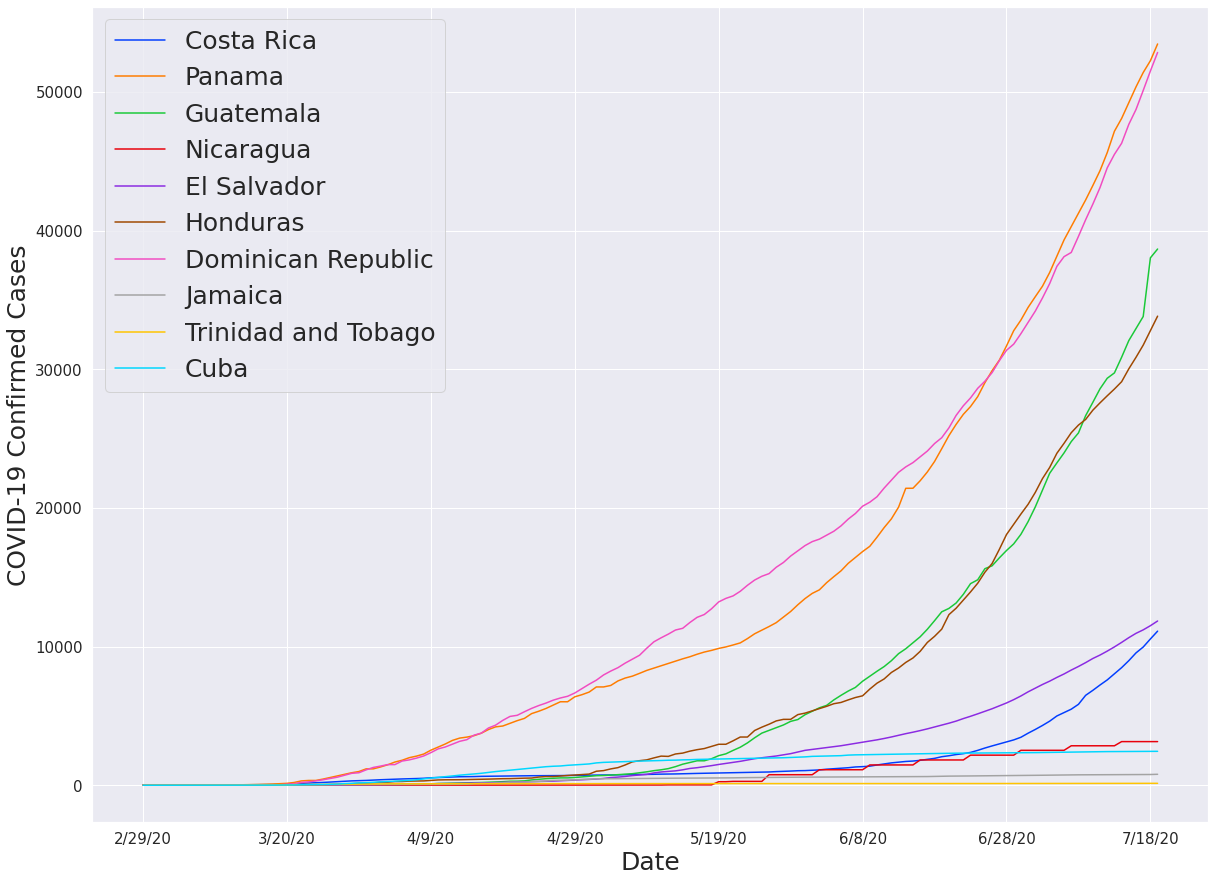

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

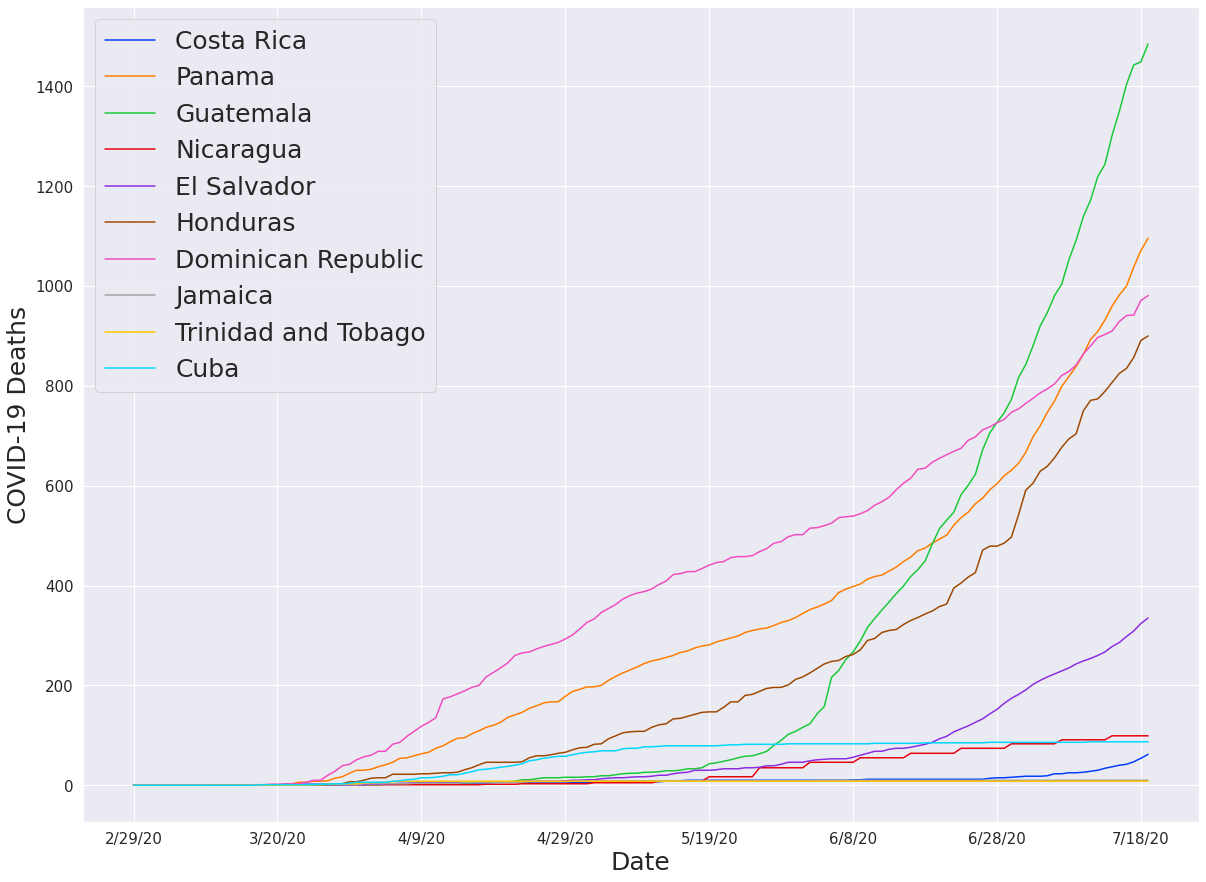

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
3/1/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/2/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/3/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/4/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/5/20          0.0     0.0        0.0        0.0          0.0       0.0   
...             ...     ...        ...        ...          ...       ...   
7/15/20       504.0  1147.0     1202.0        0.0        342.0     930.0   
7/16/20       560.0  1130.0      865.0        0.0        312.0     831.0   
7/17/20       423.0  1035.0      870.0        0.0        250.0     878.0   
7/18/20       582.0   853.0     4233.0        0.0        301.0    1048.0   
7/19/20       563.0  1207.0      635.0        0.0        338.0    1042.0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
3/1/20                  1.0      0.0                  0.0   0.0  
3/2/20                  0.0      0.0                  0.0   0.0  
3/3/20                  0.0      0.0                  0.0   0.0  
3/4/20                  0.0      0.0                  0.0   0.0  
3/5/20                  0.0      0.0                  0.0   0.0  
...                     ...      ...                  ...   ...  
7/15/20              1366.0      1.0                  0.0   6.0  
7/16/20              1072.0      2.0                  0.0   2.0  
7/17/20              1370.0      3.0                  3.0   4.0  
7/18/20              1406.0      6.0                  1.0   1.0  
7/19/20              1336.0     16.0                  0.0   1.0  

[141 rows x 10 columns]

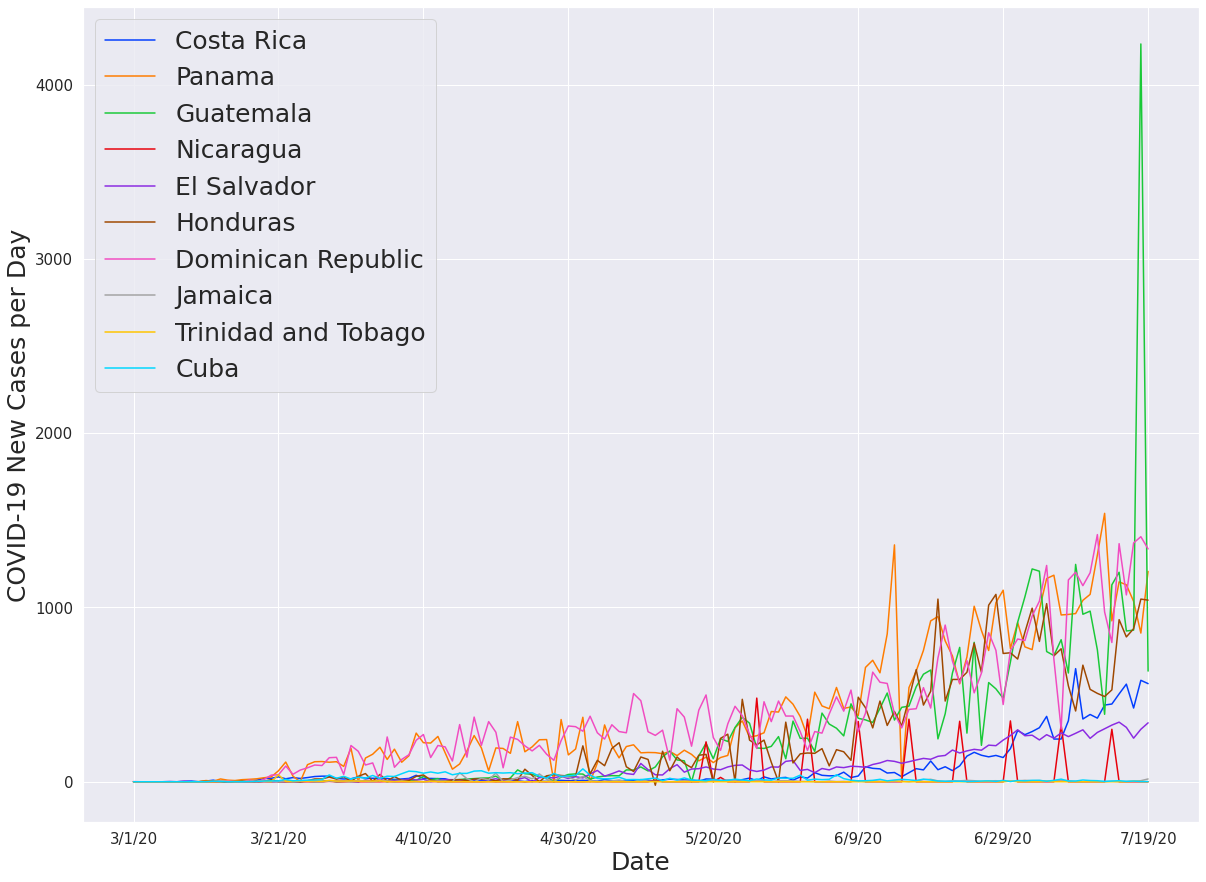

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

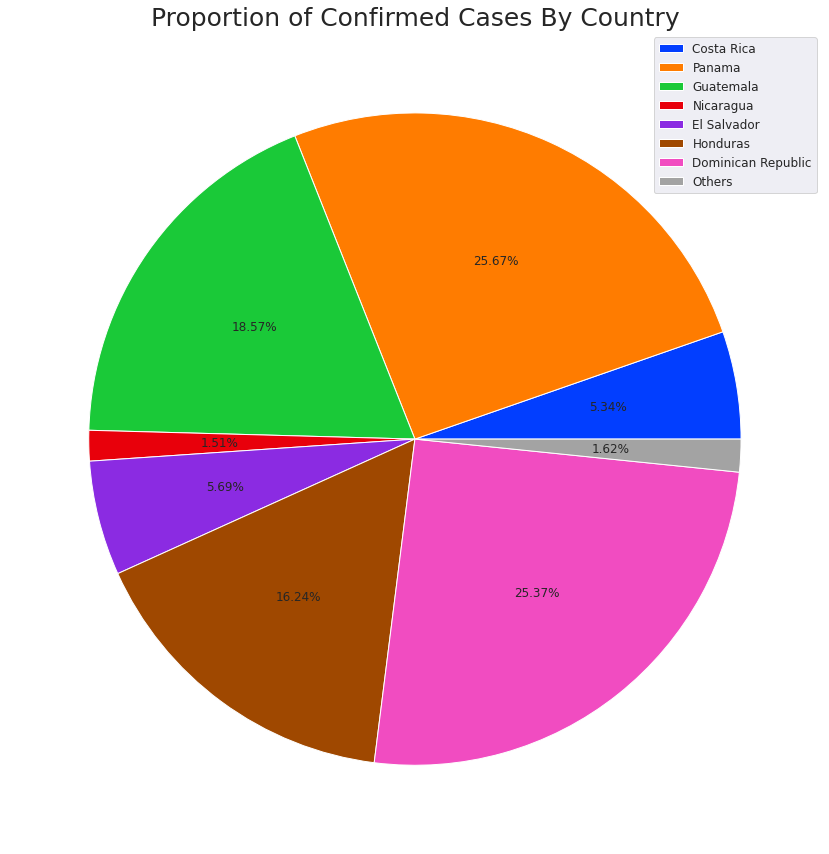

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

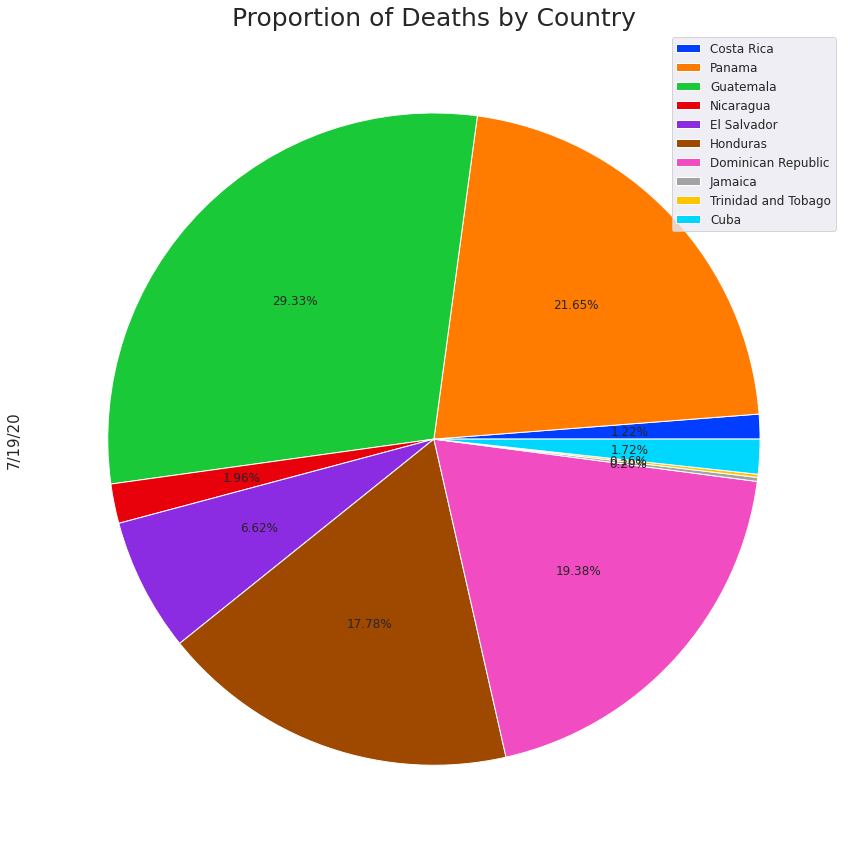

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

Costa Rica    Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20    0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/1/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/2/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/3/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/4/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
...             ...       ...        ...        ...          ...       ...   
7/15/20    1.059420  1.023848   1.038935        1.0     1.033194  1.031952   
7/16/20    1.062319  1.022947   1.026969        1.0     1.029310  1.027667   
7/17/20    1.044312  1.020547   1.026412        1.0     1.022816  1.028445   
7/18/20    1.058381  1.016593   1.125203        1.0     1.026858  1.033013   
7/19/20    1.053360  1.023096   1.016692        1.0     1.029371  1.031775   

         Dominican Republic   Jamaica  Trinidad and Tobago      Cuba  
2/29/20            0.000000  0.000000             0.000000  0.000000  
3/1/20             0.000000  0.000000             0.000000  0.000000  
3/2/20             1.000000  0.000000             0.000000  0.000000  
3/3/20             1.000000  0.000000             0.000000  0.000000  
3/4/20             1.000000  0.000000             0.000000  0.000000  
...                     ...       ...                  ...       ...  
7/15/20            1.029500  1.001312             1.000000  1.002467  
7/16/20            1.022487  1.002621             1.000000  1.000820  
7/17/20            1.028107  1.003922             1.022556  1.001639  
7/18/20            1.028057  1.007812             1.007353  1.000409  
7/19/20            1.025932  1.020672             1.000000  1.000409  

[142 rows x 10 columns]

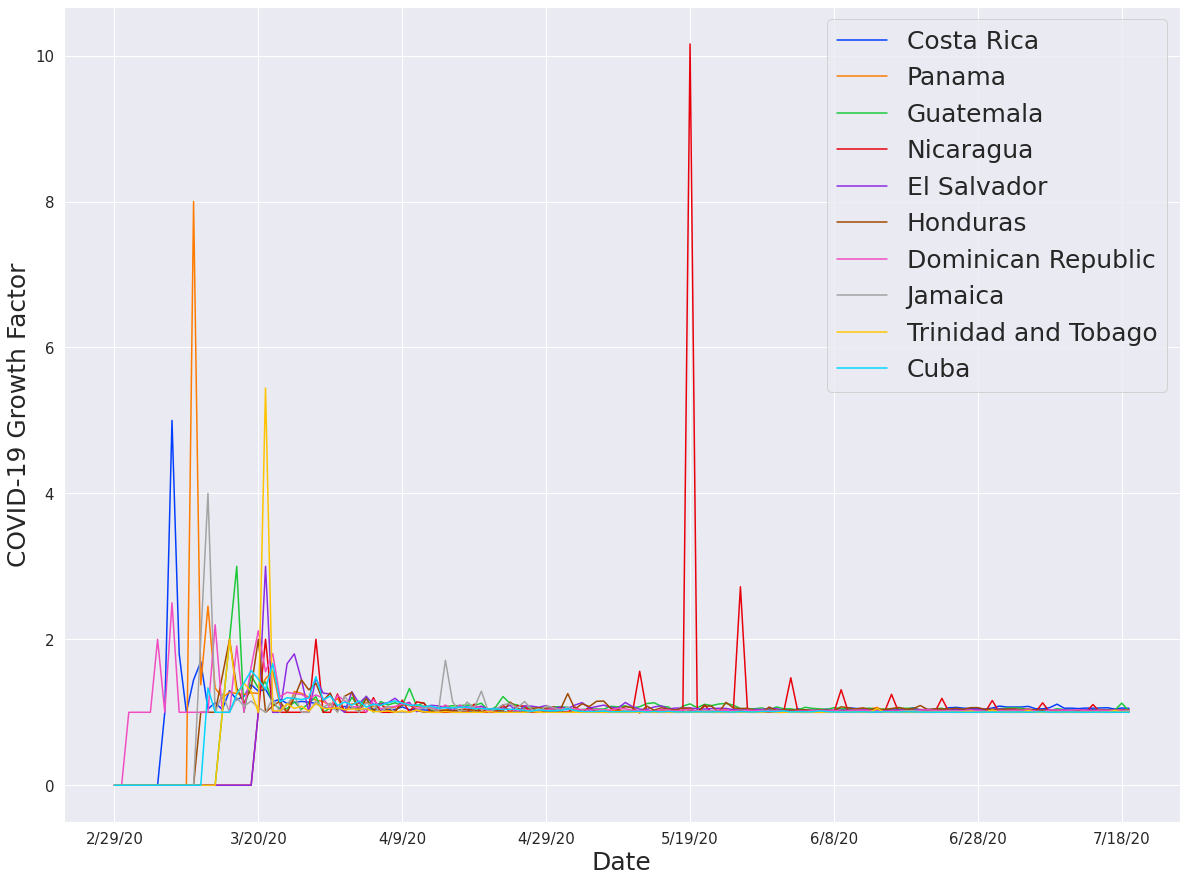

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

Costa Rica      Panama   Guatemala   Nicaragua  El Salvador  \
count  142.000000  142.000000  142.000000  142.000000   142.000000   
mean     1.038941    1.042649    0.981426    0.976343     0.937415   
std      0.420573    0.671212    0.388891    0.882458     0.426179   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      1.011113    1.020662    1.029133    1.000000     1.027713   
50%      1.031934    1.029577    1.050925    1.000000     1.035779   
75%      1.058073    1.054127    1.086605    1.000000     1.067498   
max      5.000000    8.000000    3.000000   10.160000     3.000000   

         Honduras  Dominican Republic     Jamaica  Trinidad and Tobago  \
count  142.000000          142.000000  142.000000           142.000000   
mean     0.993259            1.081452    0.979071             0.946749   
std      0.333064            0.263899    0.404143             0.503307   
min      0.000000            0.000000    0.000000             0.000000   
25%      1.019478            1.018479    1.000000             1.000000   
50%      1.038474            1.028215    1.006799             1.000000   
75%      1.064516            1.048697    1.024292             1.005515   
max      2.000000            2.500000    4.000000             5.444444   

             Cuba  
count  142.000000  
mean     0.961526  
std      0.325073  
min      0.000000  
25%      1.002173  
50%      1.006593  
75%      1.049308  
max      1.666667

In [17]:
growth_df.mean()

Costa Rica             1.038941
Panama                 1.042649
Guatemala              0.981426
Nicaragua              0.976343
El Salvador            0.937415
Honduras               0.993259
Dominican Republic     1.081452
Jamaica                0.979071
Trinidad and Tobago    0.946749
Cuba                   0.961526
dtype: float64

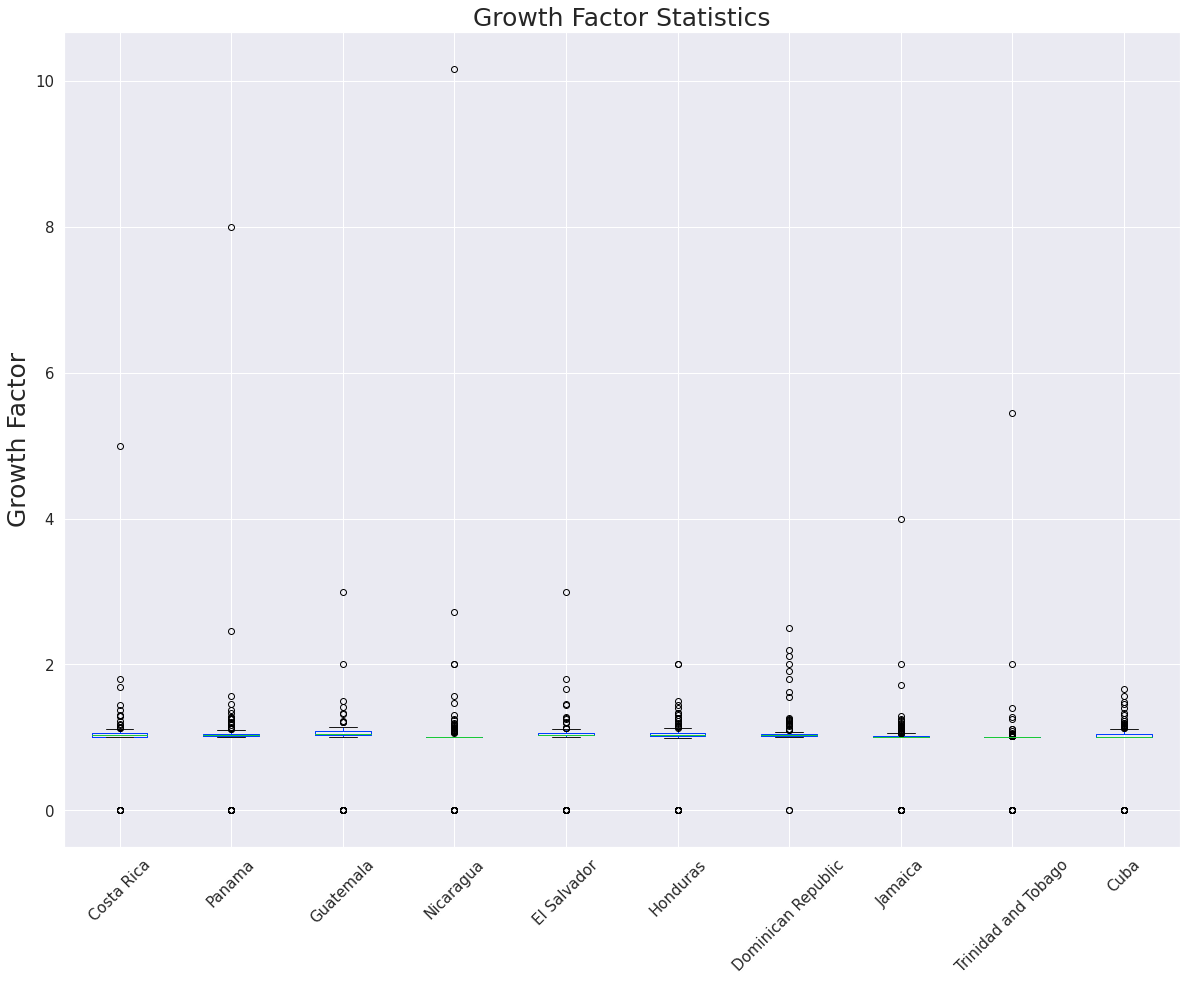

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

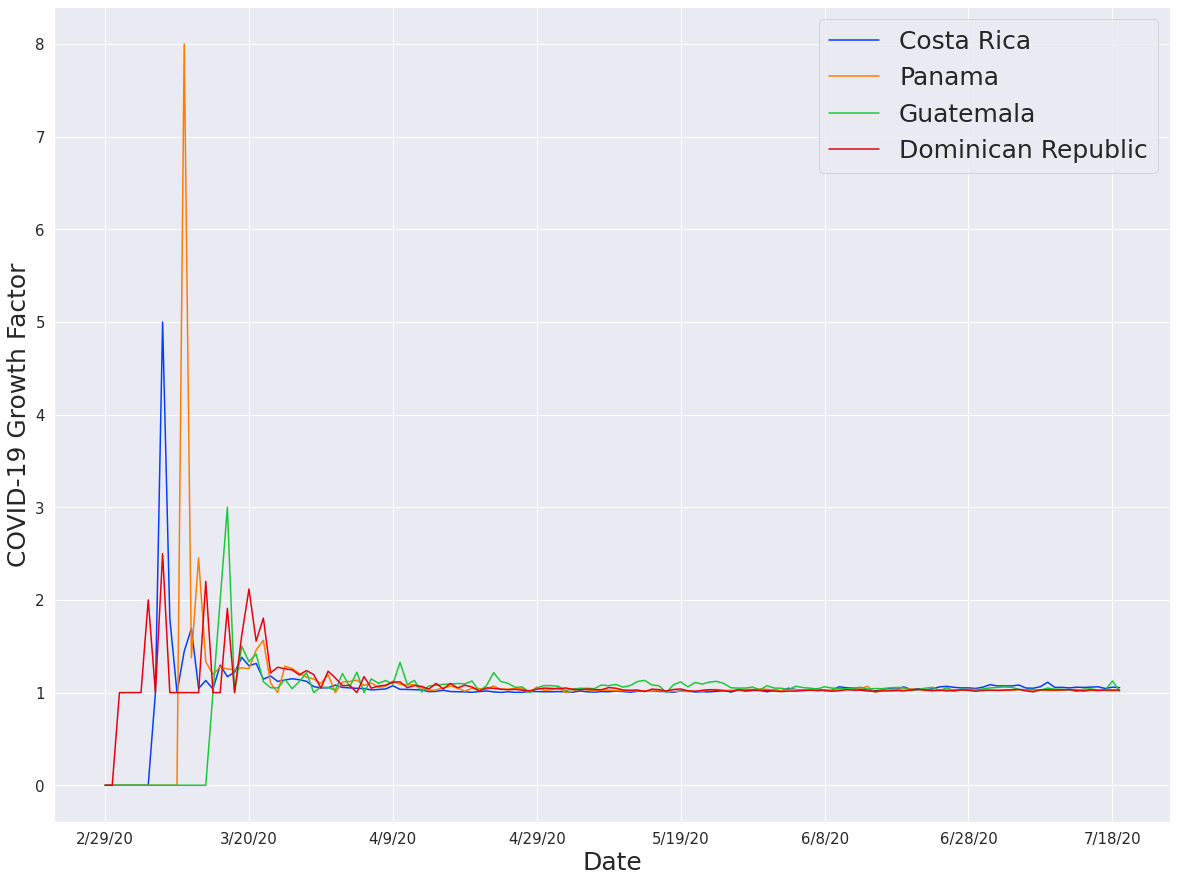

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

Costa Rica      Panama   Guatemala   Nicaragua  El Salvador  \
count  135.000000  131.000000  127.000000  122.000000   122.000000   
mean     1.092812    1.130200    1.097343    1.136399     1.091089   
std      0.356106    0.623647    0.202560    0.850915     0.206378   
min      1.000000    1.000000    1.000000    1.000000     1.000000   
25%      1.012404    1.023364    1.038200    1.000000     1.031514   
50%      1.034261    1.032036    1.055556    1.000000     1.040290   
75%      1.058900    1.063521    1.091895    1.000000     1.076573   
max      5.000000    8.000000    3.000000   10.160000     3.000000   

         Honduras  Dominican Republic     Jamaica  Trinidad and Tobago  \
count  130.000000          140.000000  130.000000           127.000000   
mean     1.084944            1.096902    1.069447             1.058569   
std      0.144935            0.231465    0.284823             0.405173   
min      0.990476            1.000000    1.000000             1.000000   
25%      1.026550            1.019103    1.002632             1.000000   
50%      1.042514            1.028464    1.007932             1.000000   
75%      1.074388            1.049075    1.043632             1.008734   
max      2.000000            2.500000    4.000000             5.444444   

             Cuba  
count  129.000000  
mean     1.058424  
std      0.114211  
min      1.000000  
25%      1.003190  
50%      1.007829  
75%      1.058968  
max      1.666667

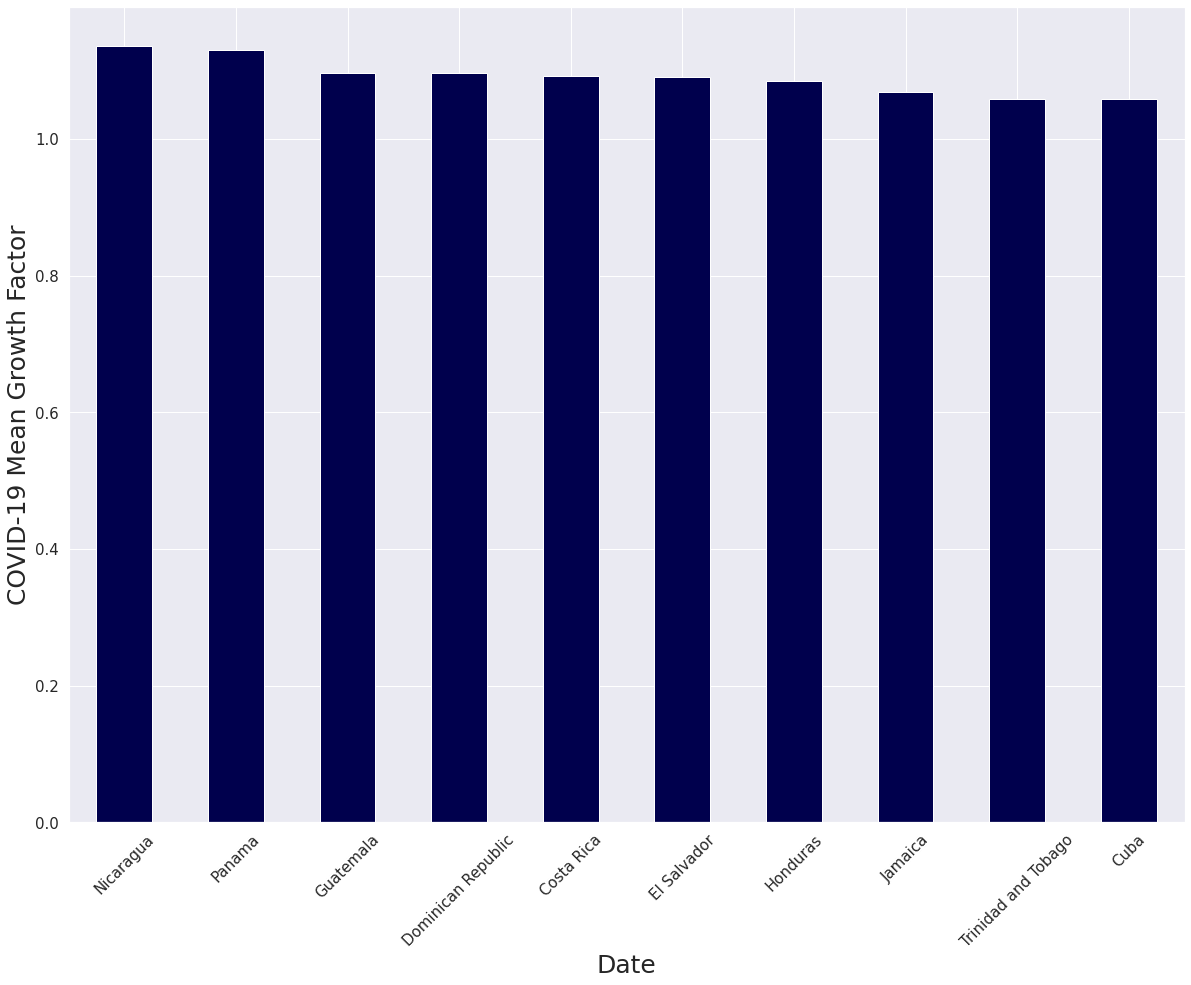

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

/home/andres/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


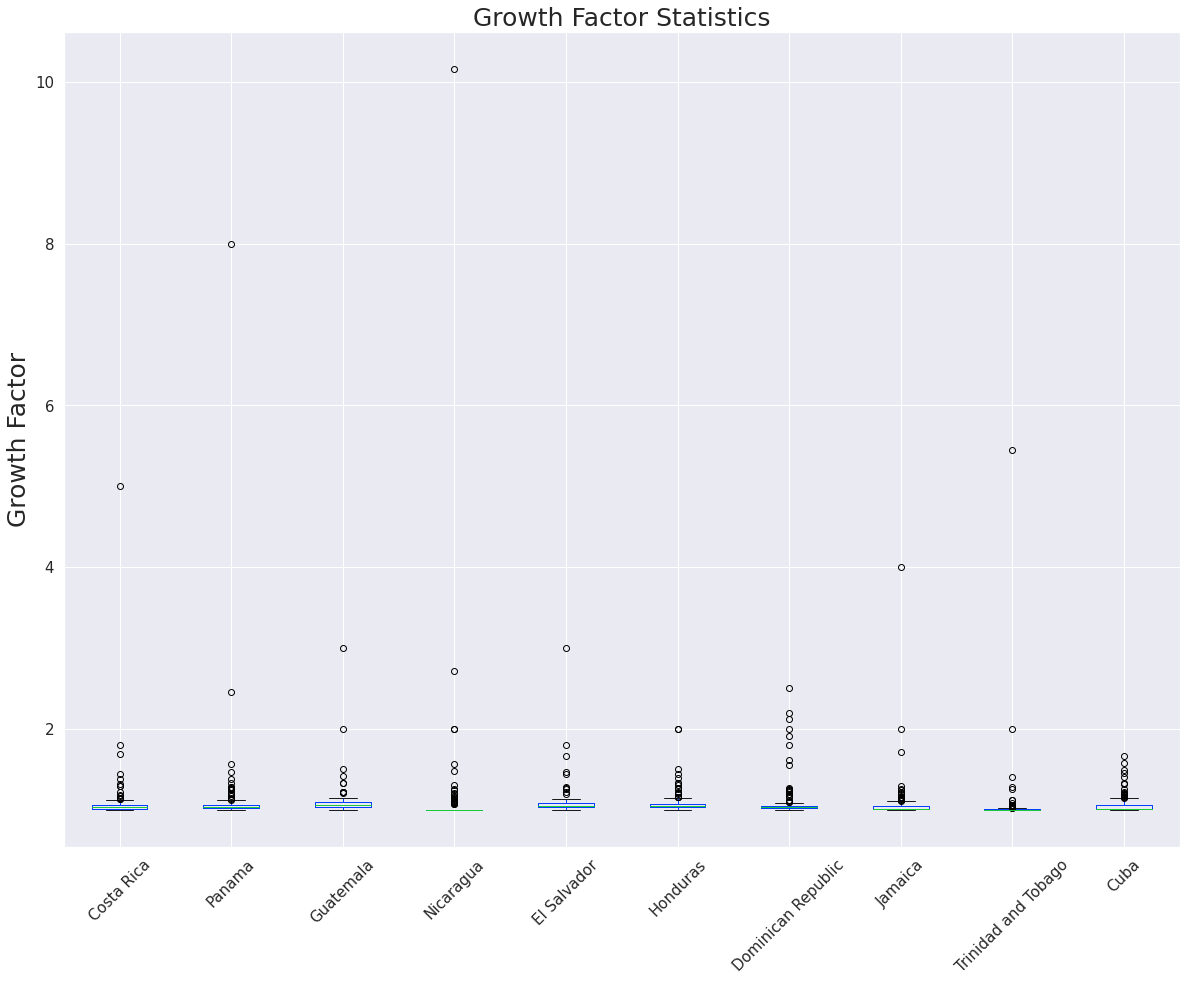

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

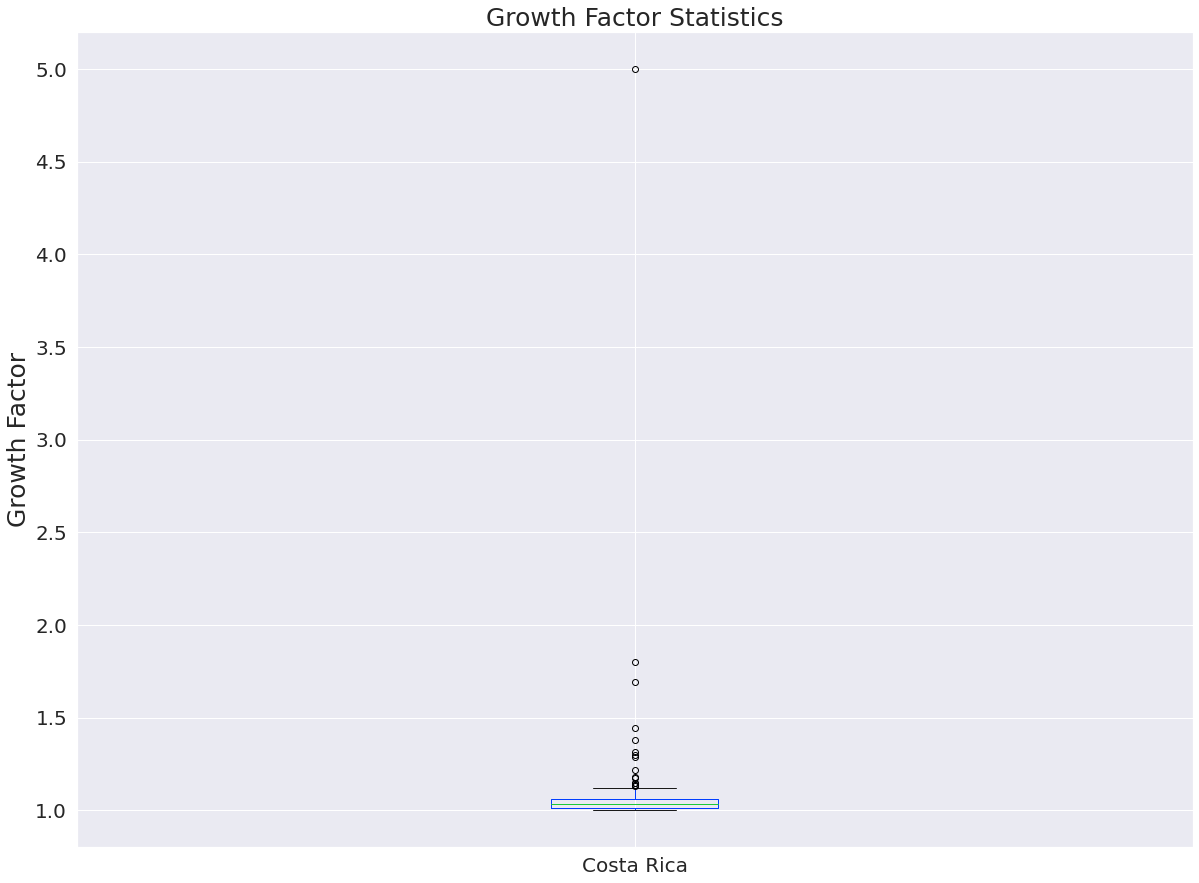

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()